In [98]:
import pandas as pd
import numpy as np

In [99]:
from sklearn.model_selection import KFold, StratifiedKFold

In [100]:
# https://www.kaggle.com/becksddf/churn-in-telecoms-dataset
df = pd.read_csv(r'C:\Python\Ykill\DataScinese\data\telecom_churn.csv')

In [101]:
y = df["Churn"].astype(int)

In [102]:
X = df.drop(columns=['Churn', 'Area code'])

In [103]:
X = X.select_dtypes(np.number)

In [104]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

## Task 1

Убедиться, что StratifiedKFold в отличии от KFold сохраняет соотношение классов. (Дописать код, вывести таблицы/графики соотношения для KFold и StratifiedKFold). Привести случай, когда KFold будет работать очень плохо

In [160]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold

n = 4

kf = KFold(n_splits=n)
skf = StratifiedKFold(n_splits=n)

print('KFold')
for train_index, test_index in kf.split(X):
    kf_y = y.iloc[train_index].value_counts()
    print(kf_y.to_dict())

print('StratifiedKFold')
for train_index, test_index in skf.split(X,y):
    skf_y = y.iloc[train_index].value_counts()
    print(kf_y.to_dict())

KFold
{0: 2124, 1: 375}
{0: 2120, 1: 380}
{0: 2153, 1: 347}
{0: 2153, 1: 347}
StratifiedKFold
{0: 2153, 1: 347}
{0: 2153, 1: 347}
{0: 2153, 1: 347}
{0: 2153, 1: 347}


In [217]:
import matplotlib.pyplot as plt
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

In [226]:
def plot_cv_indices(cv, X, y, ax, n):
    """Create a sample plot for indices of a cross-validation object."""
    classes = y
    cmap_data = plt.cm.Paired
    cmap_cv = plt.cm.coolwarm
    
    for ii, (tr, tt) in enumerate(cv.split(X, y)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        ax.scatter(range(len(indices)), 
                   [ii + .5] * len(indices),
                   c=indices, 
                   marker='_', 
                   lw=20, 
                   cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)
    
    ax.scatter(range(len(classes)),  
               [4.5] * len(classes), 
               c=classes, 
               marker='_', 
               lw=20, 
               cmap=cmap_data)

    yticklabels = list(range(n)) + ['class']

    ax.set(yticks=np.arange(n+2) + .5, 
           yticklabels=yticklabels,
           xlabel='Sample index', 
           ylabel="CV iteration",
           ylim=[n+1.2, -.2])
    
    ax.set_title('{}'.format(type(cv).__name__), fontsize=20);
    
    return ax

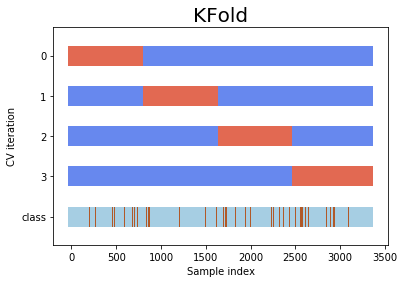

In [228]:
fig, ax = plt.subplots()
plot_cv_indices(kf, X, y, ax, n);

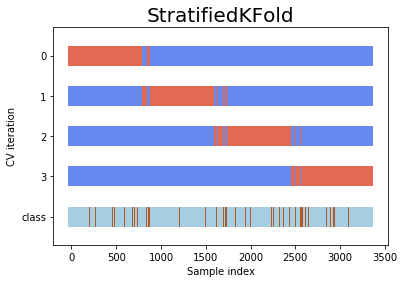

In [229]:
fig, ax = plt.subplots()
plot_cv_indices(skf, X, y, ax, n);

модель данных, в которых методу __KFold__ следует отдать предпочтение __StratifiedKFold__

In [250]:
df_sort = df.sort_values('Churn')

In [251]:
y_sort = df_sort["Churn"].astype(int)
X_sort = df_sort.drop(columns=['Churn', 'Area code']).select_dtypes(np.number)

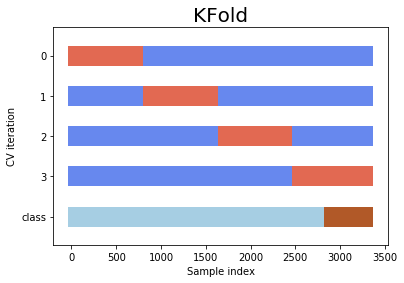

In [252]:
fig, ax = plt.subplots()
plot_cv_indices(kf, X_sort, y_sort, ax, n);

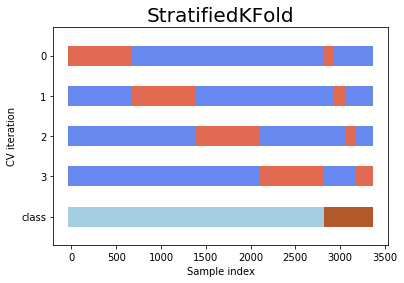

In [253]:
fig, ax = plt.subplots()
plot_cv_indices(skf, X_sort, y_sort, ax, n);

## Task 2
Написать функцию, которая будет находить наилучшее разбиение(по индексу). 

Вход: для листа с целочисленными значениями inp = [0, 1, 0, 0, 1, 1, 1, 0] . <br>
Выход: индекс, по которому наиболее оптимально разбить выборку. <br>

(Применить энтропию Шеннона)

In [436]:
import numpy as np
import math
from collections import Counter

# Shannon Entropy
def sh_entropy(arr):
    Ni = np.unique(arr, return_counts=True)[1][0]
    Nj = np.unique(arr, return_counts=True)[1][1]
#     print(Ni,'||',Nj)
    N = arr.size
    pi = Ni/N
    pj = Nj/N
    result = - (pi * math.log(pi)) - (pj * math.log(pj)) # math.log(X,[база]) без базы = Ln(X)
    return round(result, 3)

In [456]:
# ipn = [0, 1, 0, 0, 1, 1, 1, 0]
ipn = [1, 0, 1, 1, 0, 0, 1] 

In [458]:
a = np.array(ipn)
full_entr = sh_entropy(a)
nn = 1
d = [full_entr, full_entr]

while nn < a.size:
    a1 = a[nn:]
    a2 = a[:nn]
    
    if len(np.unique(a1)) == 2 & len(np.unique(a2)) == 2:
        sh1 = sh_entropy(a1)
        sh2 = sh_entropy(a2)
        
        if (sh1 < d[0]) & (sh2 < d[1]):
            d = [sh1, sh2]
            idx = nn
    nn+=1

print(f'При индексе {idx} оптимальное разбиение списка с энтропиями {d[0]} и {d[1]}')

При индексе 4 оптимальное разбиение списка с энтропиями 0.637 и 0.562


## Task 3

применить свежеизученные алгоритмы (Дерево Решений, Случайный Лес, XGBoost) для задачи регрессии (оценка недвижимости https://www.kaggle.com/harlfoxem/housesalesprediction). Решение по данной задаче слать отдельным ноутбуком
